In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd

In [5]:
from IPython.display import display

In [6]:
!ls *.csv

customer_test.csv   stories_description.csv	transactions.csv
customer_train.csv  stories_reaction_test.csv
sample_submit.csv   stories_reaction_train.csv


In [7]:
def pd_intersection(a, b):
    a = set(a)
    b = set(b)
    c = a.intersection(b)
    print(f'a: {len(a)}, b: {len(b)}, c: {len(c)}')

# customer

In [8]:
df_cust_train = pd.read_csv('customer_train.csv')
df_cust_train.head()

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,894436,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,30.0,MAR,0.0,2018-03-20 09:10:16,1,Неруководящий сотрудник - обсл. Персонал
1,524526,NaN,UTL,NaN,NaN,NaN,UTL,NaN,F,20.0,UNM,0.0,2017-03-29 20:38:45,16,NaN
2,498134,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,25.0,UNM,0.0,2018-03-12 11:25:06,22,NaN
3,278941,NaN,NaN,UTL,CLS,NaN,UTL,UTL,M,25.0,NaN,NaN,2016-02-21 18:47:51,16,Неруководящий сотрудник - специалист
4,877312,NaN,UTL,NaN,NaN,NaN,NaN,NaN,F,40.0,MAR,0.0,2018-03-07 11:17:02,22,NaN


In [9]:
df_cust_valid = pd.read_csv('customer_test.csv')
df_cust_valid.head()

,customer_id,product_0,product_1,product_2,product_3,product_4,product_5,product_6,gender_cd,age,marital_status_cd,children_cnt,first_session_dttm,job_position_cd,job_title
0,234305,NaN,NaN,NaN,NaN,NaN,UTL,NaN,F,25.0,NaN,0.0,2015-10-29 09:59:10,22,Менеджер проектов
1,914339,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,15.0,NaN,0.0,2018-04-09 08:51:54,22,NaN
2,895631,NaN,NaN,NaN,NaN,NaN,UTL,NaN,M,20.0,NaN,0.0,2018-03-22 10:38:33,16,Менеджер по продажам
3,954837,NaN,NaN,NaN,NaN,NaN,UTL,NaN,F,25.0,NaN,0.0,2018-05-09 18:24:32,16,Инженер
4,391590,NaN,UTL,NaN,NaN,NaN,NaN,NaN,M,30.0,UNM,0.0,2016-10-08 05:29:20,20,сборщик мебели


In [10]:
pd_intersection(
    df_cust_train['customer_id'].unique().tolist(),
    df_cust_valid['customer_id'].unique().tolist(),
)

a: 50000, b: 54245, c: 50000


# stories_reaction

In [11]:
df_user_item_train = pd.read_csv('stories_reaction_train.csv')
df_user_item_train.head()

,customer_id,story_id,event_dttm,event
0,15,138,2018-07-24 15:33:22,view
1,15,202,2018-06-04 08:08:08,skip
2,15,222,2018-06-17 13:44:45,skip
3,15,379,2018-05-23 05:41:43,skip
4,15,544,2018-07-25 02:16:29,view


In [12]:
df_user_item_valid = pd.read_csv('stories_reaction_test.csv')
df_user_item_valid.head()

,customer_id,story_id,event_dttm,answer_id
0,466906,1152,2018-08-01 00:00:46,0
1,466906,1355,2018-08-01 00:00:46,1
2,146395,537,2018-08-01 00:02:08,2
3,897303,915,2018-08-01 00:02:30,3
4,50094,1415,2018-08-01 00:03:13,4


In [13]:
df_user_item_train['event_dttm'] = pd.to_datetime(df_user_item_train['event_dttm'])
df_user_item_valid['event_dttm'] = pd.to_datetime(df_user_item_valid['event_dttm'])

In [14]:
pd_intersection(
    df_user_item_train['customer_id'].unique().tolist(),
    df_user_item_valid['customer_id'].unique().tolist(),
)

a: 41001, b: 22646, c: 14260


In [15]:
df_user_item_train['event_dttm'].agg(['min', 'max'])

min   2018-03-29 11:30:44
max   2018-07-31 23:58:14
Name: event_dttm, dtype: datetime64[ns]

In [16]:
df_user_item_valid['event_dttm'].agg(['min', 'max'])

min   2018-08-01 00:00:46
max   2018-08-22 20:49:33
Name: event_dttm, dtype: datetime64[ns]

In [17]:
def plot_dates(s_dt):
    s = s_dt.dt.floor('D')
    s = s - pd.to_timedelta(s.dt.day - 1, 'D')
    s = s.value_counts()
    return s

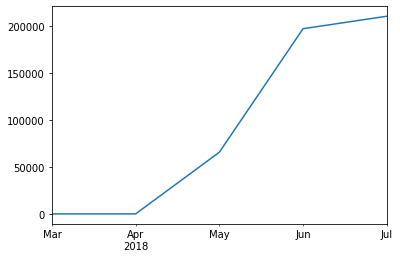

In [18]:
plot_dates(df_user_item_train['event_dttm']).plot()

In [19]:
plot_dates(df_user_item_valid['event_dttm'])

2018-08-01    172049
Name: event_dttm, dtype: int64

In [20]:
len(df_user_item_train) / (len(df_user_item_train) + len(df_user_item_valid))

0.7333359165517135

In [21]:
df_user_item_train = df_user_item_train.sort_values('event_dttm')

In [22]:
split_pos = int(len(df_user_item_train) * 0.75)
df_user_item_train, df_user_item_test = df_user_item_train.iloc[:split_pos], df_user_item_train.iloc[split_pos:]

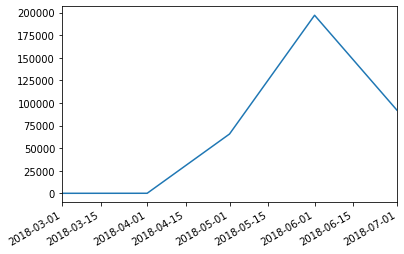

In [23]:
plot_dates(df_user_item_train['event_dttm']).plot()

In [24]:
plot_dates(df_user_item_test['event_dttm'])

2018-07-01    118286
Name: event_dttm, dtype: int64

### Пересечение train и test по просмотренным items

In [25]:
len(df_user_item_train.groupby(['customer_id', 'story_id']).count())

337245

In [26]:
len(df_user_item_test.groupby(['customer_id', 'story_id']).count())

113391

In [27]:
pd.merge(
    df_user_item_train.groupby(['customer_id', 'story_id']).count(),
    df_user_item_test.groupby(['customer_id', 'story_id']).count(),
    how='inner', left_index=True, right_index=True)

,,event_dttm_x,event_x,event_dttm_y,event_y
customer_id,story_id,,,,
521,1211,2,2,2,2
1939,509,1,1,1,1
2679,509,1,1,1,1
2846,956,1,1,1,1
3431,1312,1,1,1,1
...,...,...,...,...,...
974220,1245,1,1,1,1
975675,1286,1,1,1,1
979046,1224,1,1,1,1


# transactions

In [28]:
df_trans = pd.read_csv('transactions.csv')
df_trans.head()

,customer_id,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,855115,7,3,1500,4554547,5411
1,997036,6,6,0,1657528,5411
2,398237,5,24,2500,26375569,5813
3,997036,6,2,0,16304402,5411
4,291636,7,25,0,1259505,5411


In [29]:
df_trans['customer_id'].nunique()

46948

In [30]:
pd_intersection(
    df_user_item_train['customer_id'].unique().tolist(),
    df_trans['customer_id'].unique().tolist(),
)

a: 34379, b: 46948, c: 30795


In [31]:
pd_intersection(
    df_user_item_test['customer_id'].unique().tolist(),
    df_trans['customer_id'].unique().tolist(),
)

a: 17218, b: 46948, c: 15757


In [32]:
pd_intersection(
    df_user_item_valid['customer_id'].unique().tolist(),
    df_trans['customer_id'].unique().tolist(),
)

a: 22646, b: 46948, c: 20053


# stories_description

In [33]:
df_stories = pd.read_csv('stories_description.csv')
df_stories.head()

,story_id,story_json
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""..."
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""..."
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""..."
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""..."
4,598,"{""guid"":""ed8754bd-67be-4fa1-9289-5508d96f1fa4""..."


# Baseline

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
df_event_weights = pd.Series({
    'dislike': -10,
    'skip': -0.1,
    'view': 0.1,
    'like': 0.5,
})
df_event_weights

dislike   -10.0
skip       -0.1
view        0.1
like        0.5
dtype: float64

In [36]:
def tinkoff_metric(df):
    s_event_weights = df['event'].map(df_event_weights)
    res = s_event_weights * df['score']
    return res.mean().round(6), len(res)

In [37]:
def tinkoff_metric_split(df):
    df = df.copy()
    df['cust_kind'] = df['customer_id'].isin(df_user_item_train['customer_id'].unique()) \
        .map({True: 'warm', False: 'cold'})
    
    return {
        'all': tinkoff_metric(df),
        'cold': tinkoff_metric(df[df['cust_kind'].eq('cold')]),
        'warm': tinkoff_metric(df[df['cust_kind'].eq('warm')]),
    }

In [38]:
def label_ranking_average_precision_score(df_scores):
    df = pd.merge(df_scores, df_true.assign(hit=1), how='left', on=['user_id', 'item_id'])
    df['hit'] = df['hit'].fillna(0)
    df = df.sort_values(['user_id', 'relevance'], ascending=[True, False])

    df['rank'] = df.groupby('user_id').cumcount() + 1
    df['hit_count'] = df.groupby('user_id')['hit'].cumsum()
    df['score'] = df['hit_count'] / df['rank']
    df = df[df['hit'].eq(1)]

    rank_hist = df.groupby('rank')['user_id'].count().sort_index()
    total_rank_hist = rank_hist.sum()
    show_pos = 5
    info = ', '.join(
        f'{x:.2f}' for x in [v / total_rank_hist for _, v in sorted(rank_hist.iloc[:show_pos].to_dict().items())] +
        [rank_hist.iloc[show_pos:].sum() / total_rank_hist]
    )
    logger.info(f'rank_hist: [{info} ...] from {total_rank_hist}')

    df = df.groupby('user_id')['score'].mean()

    if not reduce:
        return df
    score = df.mean()
    return float(score)


## Const

In [39]:
df_test_predict = df_user_item_test.copy()
df_test_predict['score'] = -1

In [40]:
tinkoff_metric_split(df_test_predict)

{'all': (0.057478, 118286),
 'cold': (0.090072, 22634),
 'warm': (0.049765, 95652)}

## Polular prediction

In [41]:
df_user_item_train.groupby('event')[['customer_id']].count() / len(df_user_item_train)

,customer_id
event,
dislike,0.014606
like,0.132426
skip,0.353203
view,0.499765


In [42]:
df_user_item_train.pivot_table(
    index='customer_id', columns='event',
    values='story_id', aggfunc='count', fill_value=0).gt(0).mean()

event
dislike    0.068501
like       0.252072
skip       0.734780
view       0.823032
dtype: float64

In [43]:
df_user_item_train.pivot_table(
    index='story_id', columns='event',
    values='customer_id', aggfunc='count', fill_value=0).gt(0).mean()

event
dislike    0.533825
like       0.674047
skip       0.932349
view       0.971710
dtype: float64

In [44]:
# fit users
df_train_user_popularity = df_user_item_train.pivot_table(
    index='customer_id', columns='event',
    values='story_id', aggfunc='count', fill_value=0)

df_train_user_popularity = df_train_user_popularity.div(df_train_user_popularity.sum(axis=1), axis=0)

df_train_user_popularity

event,dislike,like,skip,view
customer_id,,,,
15,0.0,0.000000,0.411765,0.588235
73,0.0,0.000000,0.846154,0.153846
129,0.0,0.000000,0.562500,0.437500
144,0.0,0.000000,0.000000,1.000000
150,0.0,0.333333,0.666667,0.000000
...,...,...,...,...
1095251,0.0,0.000000,0.000000,1.000000
1098683,0.0,0.000000,1.000000,0.000000
1099266,0.0,0.000000,0.500000,0.500000


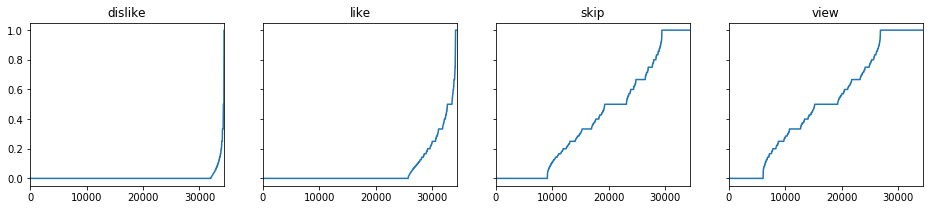

In [45]:
_, axs = plt.subplots(1, 4, figsize=(16, 3), sharey=True)
for col, ax in zip(['dislike', 'like', 'skip', 'view'], axs):
    df_train_user_popularity[col].sort_values().reset_index(drop=True).plot(ax=ax, title=col)

In [46]:
df_event_scores = {
    'dislike': -10,
    'skip': -0.0,
    'view': 0.0,
    'like': 1.0,
}

In [47]:
df_train_user_popularity += 0.01
df_train_user_popularity_score = df_train_user_popularity.mul(df_event_scores)
df_train_user_popularity_score = df_train_user_popularity_score.div(df_train_user_popularity.sum(axis=1), axis=0)
df_train_user_popularity_score = df_train_user_popularity_score.sum(axis=1).rename('user_score')

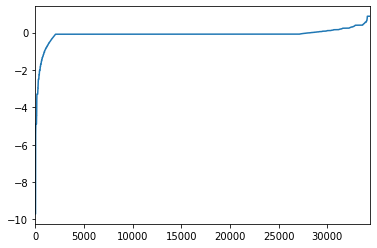

In [48]:
df_train_user_popularity_score.sort_values().reset_index(drop=True).plot()

In [49]:
# fit items
df_train_item_popularity = pd.merge(
    df_user_item_train[lambda x: x['event'].isin(['dislike', 'like'])].assign(score=df_user_item_train['event'].map(df_event_scores)),
    df_train_user_popularity_score,
    left_on='customer_id', right_index=True,
).assign(item_score=lambda x: x.score - x.user_score * 0.2) \
    .groupby('story_id')['item_score'].mean().sort_values()

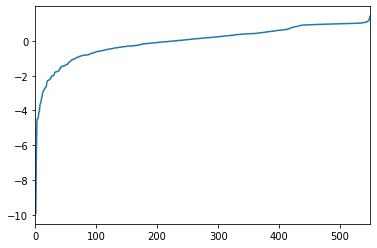

In [50]:
df_train_item_popularity.reset_index(drop=True).plot()

In [51]:
# predict
df_train_predict = pd.merge(
    pd.merge(df_user_item_train, df_train_item_popularity,
                           how='left', left_on='story_id', right_index=True).fillna(0.0),
    df_train_user_popularity_score,
    how='left', left_on='customer_id', right_index=True
).fillna(0.0).assign(score=lambda x: x.item_score + x.user_score * 0.2)


df_test_predict = pd.merge(
    pd.merge(df_user_item_test, df_train_item_popularity,
                           how='left', left_on='story_id', right_index=True).fillna(0.0),
    df_train_user_popularity_score,
    how='left', left_on='customer_id', right_index=True
).fillna(0.0).assign(score=lambda x: x.item_score + x.user_score * 0.2)

In [52]:
df_train_predict

,customer_id,story_id,event_dttm,event,item_score,user_score,score
415192,843538,522,2018-03-29 11:30:44,skip,0.673315,-0.086538,0.656007
415188,843538,247,2018-03-29 11:30:44,view,0.000000,-0.086538,-0.017308
376367,749436,498,2018-03-31 04:47:12,skip,0.421199,-0.086538,0.403891
415190,843538,428,2018-04-03 05:13:38,skip,0.231920,-0.086538,0.214612
415189,843538,419,2018-04-03 05:13:38,view,0.065511,-0.086538,0.048203
...,...,...,...,...,...,...,...
64049,132061,314,2018-07-15 11:49:52,dislike,-3.246814,-2.009615,-3.648737
205344,387489,745,2018-07-15 11:52:38,view,-0.014721,-0.086538,-0.032028
205345,387489,997,2018-07-15 11:52:38,view,-0.940392,-0.086538,-0.957700
219993,414840,1000083,2018-07-15 11:53:04,view,1.060707,-0.086538,1.043399


In [53]:
def rocauc_by_cust(df):
    df = df.copy()
    df = df[df['event'].isin(['dislike', 'like'])]
    df['event'] = df['event'].map({'dislike': 0, 'like': 1})

    res = df.groupby('customer_id').apply(lambda x: roc_auc_score(x['event'], x['score'])
                                          if x['event'].nunique() > 1 else np.NaN)
    return res    

In [54]:
rocauc_by_cust(df_train_predict).mean()

0.7140948563228902

In [55]:
rocauc_by_cust(df_test_predict).mean()

0.7217124146908913

0.7204284251205677

In [56]:
rocauc_by_cust(df_test_predict[lambda x: x.customer_id.isin(df_train_predict.customer_id)]).mean()

0.7206346775503243

0.7192049210481039

In [57]:
rocauc_by_cust(df_test_predict[lambda x: ~x.customer_id.isin(df_train_predict.customer_id)]).mean()

0.7312056737588652

0.7312056737588652

# df_embeddings

In [298]:
df_embeddings = pd.read_pickle('/data/kireev-ia/data_open_ds/tinkoff_all_vectors.pickle').set_index('customer_id')
df_embeddings.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v054,v055,v056,v057,v058,v059,v060,v061,v062,v063
customer_id,,,,,,,,,,,,,,,,,,,,,
15,0.045986,0.073066,-0.102657,-0.070000,-0.226388,0.021740,0.095810,0.140051,0.131922,-0.026116,...,-0.005688,0.162406,-0.067965,-0.040175,0.164212,-0.099997,0.077077,0.011274,-0.008279,-0.003820
73,0.154809,0.037429,-0.177134,-0.045597,-0.121371,-0.060306,0.174855,0.182637,0.093187,-0.010200,...,0.097886,0.177703,0.123618,-0.145646,0.152623,-0.057651,0.164589,-0.121165,-0.115062,-0.051746
91,0.014153,-0.048872,-0.187590,0.035219,-0.189449,0.017896,0.180154,-0.005428,0.079310,0.065733,...,0.105551,0.161654,-0.068084,-0.094257,0.150516,-0.059367,-0.019642,-0.059673,-0.019760,0.078213
144,0.003958,0.175994,-0.069661,0.079811,-0.202884,-0.170080,0.166775,0.042914,0.159432,-0.060284,...,0.018247,0.256953,-0.035306,-0.055328,0.184141,-0.125160,-0.011663,-0.024973,-0.033970,0.025868
150,-0.117107,0.131219,-0.116869,0.079403,-0.202366,0.062064,0.164296,0.051221,0.113916,0.027527,...,0.004127,0.177279,0.014191,-0.062098,0.028283,-0.136526,-0.015416,0.072359,-0.042742,0.024230


# Feature approach

In [58]:
df_f_train = df_user_item_train \
    .assign(event=lambda x: x.event.map({'dislike': 0, 'like': 1})) \
    [lambda x: x.event.isin([0, 1])]
df_f_train

,customer_id,story_id,event_dttm,event
298085,588284,950,2018-05-22 18:52:24,1.0
343896,679459,592,2018-05-22 20:58:07,0.0
175247,325281,317,2018-05-22 21:13:42,1.0
175249,325281,352,2018-05-22 21:13:42,1.0
266386,519549,956,2018-05-22 21:16:29,1.0
...,...,...,...,...
67985,137202,1314,2018-07-15 11:45:57,1.0
67974,137202,956,2018-07-15 11:45:57,1.0
67970,137202,713,2018-07-15 11:45:57,0.0
67984,137202,1295,2018-07-15 11:45:57,1.0


In [59]:
ix_items = df_f_train['story_id'].value_counts(normalize=True).cumsum().iloc[:400].index.tolist()
ix_items

[379,
 644,
 956,
 1057,
 1008,
 419,
 967,
 449,
 968,
 950,
 592,
 1279,
 1005,
 980,
 708,
 1018,
 885,
 997,
 1031,
 1079,
 959,
 1276,
 745,
 1269,
 420,
 354,
 1294,
 1120,
 1056,
 1100,
 409,
 1023,
 1261,
 1145,
 912,
 448,
 627,
 1182,
 1264,
 1093,
 978,
 1020,
 1039,
 1046,
 975,
 1160,
 1152,
 544,
 954,
 1000,
 1092,
 1214,
 1101,
 1040,
 877,
 1243,
 1272,
 875,
 999,
 992,
 537,
 1141,
 1095,
 949,
 1058,
 1074,
 794,
 1029,
 1184,
 1087,
 538,
 823,
 314,
 543,
 977,
 1180,
 1013,
 784,
 586,
 893,
 1223,
 610,
 1037,
 1310,
 293,
 819,
 1311,
 382,
 870,
 1102,
 789,
 1157,
 734,
 480,
 582,
 1247,
 1289,
 1003,
 1147,
 938,
 1025,
 958,
 607,
 1181,
 820,
 1173,
 1170,
 1002,
 1217,
 516,
 1009,
 800,
 1049,
 988,
 990,
 534,
 924,
 1146,
 312,
 580,
 1004,
 961,
 693,
 692,
 985,
 1237,
 1071,
 570,
 1015,
 1042,
 1293,
 1045,
 1043,
 770,
 1314,
 454,
 1026,
 897,
 919,
 933,
 650,
 499,
 498,
 1024,
 995,
 973,
 874,
 779,
 470,
 1240,
 1221,
 517,
 620,
 812,
 771

In [394]:
def make_features(df):
    df = df_cust_valid.set_index('customer_id')
    
    X_features = []
    
    col_product = [col for col in df.columns if col.startswith('product_')]
    for val in ['CLS', 'OPN', 'UTL']:
        X_features.append(df[col_product].eq(val).astype(int))
        
    for val in ['M', 'F']:
        X_features.append(df[['gender_cd']].eq(val).astype(int))

    X_features.append(df[['age']].fillna(30.0).astype(float).values)
    
    for val in ['MAR', 'UNM', 'DIV', 'CIV', 'WID', 'DLW']:
        X_features.append(df[['marital_status_cd']].eq(val).astype(int))
        
    X_features.append(
        (pd.Timestamp('2019-10-01') - pd.to_datetime(df['first_session_dttm'])).dt.days
        .fillna(0).values.reshape(-1, 1) / 365 * 5
    )
    
    for val in ['0.0', 'nan', '1.0', '2.0', '3.0']:
        X_features.append(df[['children_cnt']].clip(0, 3).astype(str).eq(val).astype(int))
        
    for val in [22, 16, 17, 2, 11, 20, 4, 1, 8, 3, 19, 12, 18, 7, 14, 21, 13, 15, 9, 5]:
        X_features.append(df[['job_position_cd']].eq(val).astype(int))
    
    _t = df_user_item_train.pivot_table(
        index='customer_id', columns='event',
        values='event_dttm', aggfunc='count',
    ).reindex(index=df.index, columns=['dislike', 'like', 'skip', 'view'])
    X_features.append(_t.fillna(-1).values)
    
    _t = _t.fillna(0) + (df_user_item_train.assign(cnt=1).groupby('event')['cnt'].sum() / len(df_user_item_train))
    _t = _t.div(_t.sum(axis=1), axis=0)
    X_features.append(_t.values)
    
    # X_features.append(df_embeddings.reindex(index=df.index).fillna(0.0).values)
    
    _t = df_trans \
        [lambda x: x.merchant_mcc.isin(df_trans['merchant_mcc'].value_counts().iloc[:300].index)] \
        .pivot_table(index='customer_id', columns='merchant_mcc', values='transaction_amt', aggfunc='count') \
        .reindex(index=df.index) \
        .fillna(0)
    X_features.append(_t.values)
    _t = _t.div(_t.sum(axis=1) + 0.1, axis=0)
    X_features.append(_t.values)
    
    df = pd.DataFrame(index=df.index, data=np.concatenate(X_features, axis=1))
    return df

In [395]:
df_cust_features = make_features(df_cust_valid)
df_cust_features

,0,1,2,3,4,5,6,7,8,9,...,654,655,656,657,658,659,660,661,662,663
customer_id,,,,,,,,,,,,,,,,,,,,,
234305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.003998,0.0,0.0,0.0,0.000000,0.0,0.0
914339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
895631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.025940,0.0,0.0,0.0,0.038911,0.0,0.0
954837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020394,0.0,0.0,0.0,0.006798,0.0,0.0
391590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
883189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
760673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [396]:
from tqdm.autonotebook import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [398]:
models = {}
for story_id in tqdm(ix_items):
    _i_train = df_f_train[lambda x: x.story_id.eq(story_id)].set_index('customer_id')
    
    if _i_train['event'].nunique() == 1:
        continue
        
    # model = LogisticRegression(solver='liblinear')
    model = RandomForestClassifier(n_estimators=300, max_depth=3)
    # model = XGBClassifier(booster='gblinear', n_estimators=100)
    # model = XGBClassifier(booster='gbtree', n_estimators=100, max_depth=2)
    model.fit(df_cust_features.reindex(index=_i_train.index).values, _i_train['event'])
    models[story_id] = model

In [399]:
_i_train = df_f_train.set_index('customer_id')

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(df_cust_features.reindex(index=_i_train.index).values, _i_train['event'])
models['common_model'] = model

In [400]:
# predict

df_train_predict = []

for story_id in tqdm(df_user_item_train['story_id'].unique()):
    _i_train = df_user_item_train[lambda x: x.story_id.eq(story_id)].set_index('customer_id')
    
    if story_id in models:
        model = models[story_id]
    else:
        model = models['common_model']
    
    if len(model.classes_) == 1:
        df_train_predict.append(
            _i_train.assign(score=model.classes_[0])
        )
    else:
        df_train_predict.append(
            _i_train.assign(score=model.predict_proba(
                df_cust_features.reindex(index=_i_train.index).values)[:, 1])
        )
        
df_train_predict = pd.concat(df_train_predict, axis=0).reset_index()
df_train_predict

In [401]:
class ConstModel:
    @property
    def classes_(self):
        return np.array([0, 1])
    
    def predict_proba(self, X):
        return np.full((len(X), 1), 0.90) * np.array([[1, 1]])

In [402]:
df_test_predict = []

for story_id in tqdm(df_user_item_test['story_id'].unique()):
    _i_test = df_user_item_test[lambda x: x.story_id.eq(story_id)].set_index('customer_id')
    
    if story_id in models:
        model = models[story_id]
    else:
        model = models['common_model']
        model = ConstModel()
        
    if len(model.classes_) == 1:
        df_test_predict.append(
            _i_test.assign(score=model.classes_[0])
        )
    else:
        df_test_predict.append(
            _i_test.assign(score=model.predict_proba(
                df_cust_features.reindex(index=_i_test.index).values)[:, 1])
        )
        
df_test_predict = pd.concat(df_test_predict, axis=0).reset_index()
df_test_predict

,customer_id,story_id,event_dttm,event,score
0,678851,1314,2018-07-15 11:53:19,view,0.854216
1,650973,1314,2018-07-15 12:02:10,like,0.928626
2,488457,1314,2018-07-15 12:02:37,view,0.865151
3,69969,1314,2018-07-15 12:16:23,view,0.863857
4,159256,1314,2018-07-15 12:38:56,skip,0.862513
...,...,...,...,...,...
118281,695789,1403,2018-07-31 19:04:15,skip,0.900000
118282,372812,1403,2018-07-31 19:28:31,skip,0.900000
118283,177503,1403,2018-07-31 19:40:05,skip,0.900000
118284,1007199,1405,2018-07-31 18:23:35,skip,0.900000


rocauc_by_cust(df_train_predict).mean()

In [403]:
_a = rocauc_by_cust(df_test_predict).mean()
_w = rocauc_by_cust(df_test_predict[lambda x: x.customer_id.isin(df_train_predict.customer_id)]).mean()
_c = rocauc_by_cust(df_test_predict[lambda x: ~x.customer_id.isin(df_train_predict.customer_id)]).mean()

print(f"""
- all:  {_a}
- warm: {_w}
- cold: {_c}
""")


- all:  0.7101059140036896
- warm: 0.7057781635000825
- cold: 0.7482269503546098



```
Cust Feature Model, Popularity Feature, Trx Agg, (n_estimators=300, max_depth=3):
- all:  0.7101059140036896
- warm: 0.7057781635000825
- cold: 0.7482269503546098

Cust Feature Model, Popularity Feature, Embeddings, (n_estimators=300, max_depth=3):
- all:  0.6894582850396903
- warm: 0.6861681225522476
- cold: 0.7184397163120567

Cust Feature Model, Popularity Feature (n_estimators=300, max_depth=3):
- all:  0.7061087017011921
- warm: 0.6967780470634047
- cold: 0.7882978723404255

Cust, Popularity Feature (n_estimators=300, max_depth=3):
- all:  0.5941552290203047
- warm: 0.5992887936675373
- cold: 0.5489361702127659

Cust Feature Model (n_estimators=300, max_depth=3, max_features=10):
- all:  0.7109305341996397
- warm: 0.705287382285106
- cold: 0.7606382978723404

Cust Feature Model, Popularity Feature, Linear:
- all:  0.7206963192876485
- warm: 0.7180539529587907
- cold: 0.7439716312056738

Popular model:
- all:  0.7204284251205677
- warm: 0.7192049210481039
- cold: 0.7312056737588652
```